# Porting the data from quandl

In [8]:
import quandl
import pandas as pd
import datetime
#import pydoc
#import pandas_datareader.data as web

#You won't see my api key :D
with open ('private_info/quandl_api_key.txt', "r") as f:
    for line in f:
        for word in line.split():
            my_key = word 
quandl.ApiConfig.api_key = my_key

first_date="2017-1-1"
today_date = datetime.date.today().strftime("%Y-%m-%d")

apple = quandl.get("WIKI/AAPL", start_date=first_date, end_date=today_date)
microsoft = quandl.get("WIKI/MSFT", start_date=first_date, end_date=today_date)
facebook = quandl.get("WIKI/FB", start_date=first_date, end_date=today_date)
amazon = quandl.get("WIKI/AMZN", start_date=first_date, end_date=today_date)
ncyle = quandl.get("WIKI/INCY", start_date=first_date, end_date=today_date)

stocks = pd.DataFrame({"AAPL": apple['Adj. Close'], "MSFT": microsoft['Adj. Close'], "FB": facebook['Adj. Close'],
                        "AMZN": amazon['Adj. Close'], "INCY": ncyle['Adj. Close']})
 
# #stocks = stocks[::-1] #quandl data is in reverse time
stocks.head(5)

,AAPL,MSFT,FB,AMZN,INCY
Date,,,,,
2017-01-03,114.715378,61.219142,116.86,753.67,102.320
2017-01-04,114.586983,60.945231,118.69,757.18,102.840
2017-01-05,115.169696,60.945231,120.67,780.45,104.810
2017-01-06,116.453639,61.473488,123.41,795.99,108.305
2017-01-09,117.520300,61.277837,124.90,796.92,118.525


In [2]:
# Verifty data by plotting

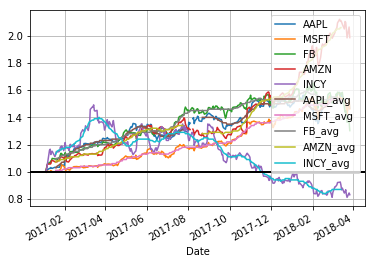

In [4]:
import matplotlib.pyplot as plt   # Import matplotlib
import numpy as np
 
stock_return = stocks.apply(lambda x: x / x[0])
#stock_return.head()
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
#stock_change.head()
#stocks['APPL_avg'] = np.round(apple["AdjClose"].rolling(window = 10, center = True).mean(), 2)
#print(stock_return['APPL'])
window_size = 20
stock_return['AAPL_avg'] = np.round(stock_return[["AAPL"]].rolling(window = window_size, center = True).mean(), 2)
stock_return['MSFT_avg'] = np.round(stock_return[["MSFT"]].rolling(window = window_size, center = True).mean(), 2)
stock_return['FB_avg'] = np.round(stock_return[["FB"]].rolling(window = window_size, center = True).mean(), 2)
stock_return['AMZN_avg'] = np.round(stock_return[["AMZN"]].rolling(window = window_size, center = True).mean(), 2)
stock_return['INCY_avg'] = np.round(stock_return[["INCY"]].rolling(window = window_size, center = True).mean(), 2)

stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
